Association rules

In [20]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

# Numero di regole in funzione di supp e conf

## numero di regole per supp=20

In [21]:
supp=20
conf_range=np.arange(50,105,5)
Nrules_supp20 = []
for i,conf in enumerate(conf_range):
    df=pd.read_csv("../../data/rules/rules_supp{}_conf{}.csv".format(supp,conf))
    df=df.query('Lift>1')
    Nrules_supp20.append(df.shape[0])
Nrules_supp20


[122, 99, 85, 81, 69, 69, 61, 53, 37, 31, 8]

In [22]:
## numero di regole per supp=10

In [23]:
supp=10
conf_range=np.arange(50,105,5)
Nrules_supp10 = []
for i,conf in enumerate(conf_range):
    df=pd.read_csv("../../data/rules/rules_supp{}_conf{}.csv".format(supp,conf))
    df=df.query('Lift>1')
    Nrules_supp10.append(df.shape[0])
Nrules_supp10


[914, 781, 695, 656, 584, 579, 542, 508, 411, 337, 63]

In [24]:
## numero di regole per supp=5

In [25]:
supp=5
conf_range=np.arange(50,105,5)
Nrules_supp5 = []
for i,conf in enumerate(conf_range):
    df=pd.read_csv("../../data/rules/rules_supp{}_conf{}.csv".format(supp,conf))
    df=df.query('Lift>1')
    Nrules_supp5.append(df.shape[0])
Nrules_supp5


[4457, 3984, 3594, 3236, 3029, 2955, 2819, 2572, 2261, 1881, 261]

# Grafico numero di regole (Lift>1)

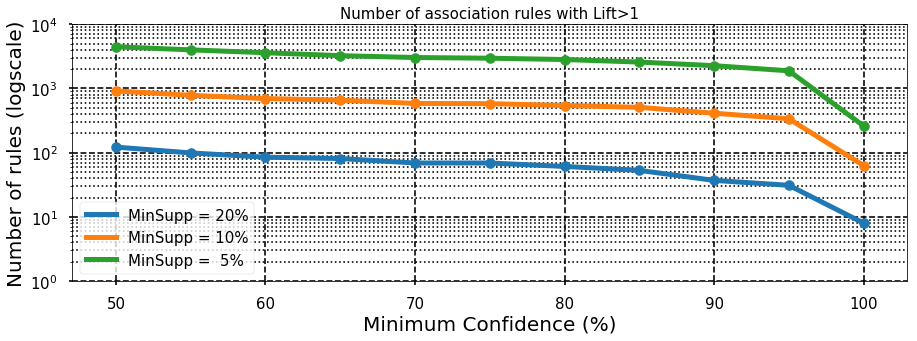

In [26]:
###########################################################
SMALL_SIZE = 15
MEDIUM_SIZE = 20
BIGGER_SIZE = 30
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y label
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
plt.rc('axes', axisbelow=True)
###########################################################

fig = plt.figure(figsize=(13,5))
ax = fig.add_subplot(111)
plt.plot(conf_range,Nrules_supp20, label='MinSupp = 20%', linewidth=5)
plt.plot(conf_range,Nrules_supp10, label='MinSupp = 10%', linewidth=5)
plt.plot(conf_range,Nrules_supp5, label='MinSupp =  5%', linewidth=5)
plt.scatter(conf_range,Nrules_supp20,s=100)
plt.scatter(conf_range,Nrules_supp10,s=100)
plt.scatter(conf_range,Nrules_supp5,s=100)

plt.legend()

ax.set_yscale('log')

plt.xlabel('Minimum Confidence (%)')
plt.ylabel('Number of rules (logscale)')

plt.ylim(1,10000)

plt.grid(b=True, which='major', color='0', linestyle='--')
plt.grid(b=True, which='minor', color='0', linestyle=':')

plt.title("Number of association rules with Lift>1")
plt.tight_layout()

plt.savefig("../../images/rules/andamentonumero.pdf")


In [27]:
###########################################################

SMALL_SIZE = 15
MEDIUM_SIZE = 20
BIGGER_SIZE = 30

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y label
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
plt.rc('axes', axisbelow=True)
###########################################################

In [28]:
# regole generali

In [29]:
df = pd.read_csv("../../data/rules/rules_supp20_conf50.csv")
df.shape
#df_filtered = df.query('Supp>0.2') # perchè non è maggiore di 20???
#df_filtered = df_filtered.query('Lift>1')
df_filtered=df
df_filtered.describe()

             Supp        Conf        Lift
count  259.000000  259.000000  259.000000
mean     0.289807    0.826911    1.112896
std      0.102271    0.154743    0.271226
min      0.200000    0.500000    0.880000
25%      0.220000    0.730000    0.990000
50%      0.260000    0.850000    1.000000
75%      0.320000    0.980000    1.125000
max      0.840000    1.000000    2.100000

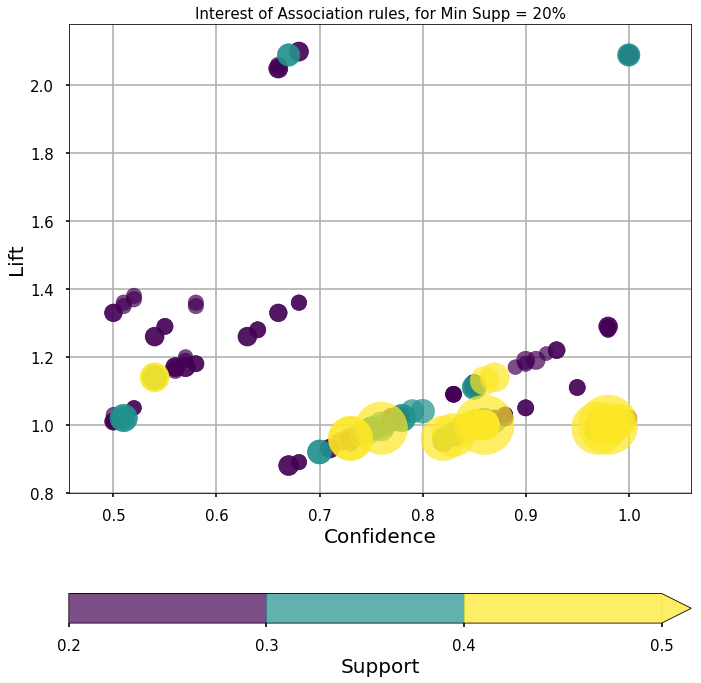

In [30]:

fig = plt.figure(figsize=(10,10))
plt.grid()
size= 5000*(df_filtered.Supp)**(2)
palette='Accent'
palette='viridis'
plt.scatter(x='Conf', y='Lift',data=df_filtered,s=size, alpha=0.7 ,c='Supp',cmap =plt.cm.get_cmap(palette,3))
cb = plt.colorbar(orientation='horizontal',extend='max',ticks=np.arange(0.20,0.70,0.10))
cb.set_label('Support')

#plt.colorbar(extend='both')
plt.clim(0.2,0.5)
plt.xlabel('Confidence')
plt.ylabel('Lift')
plt.title("Interest of Association rules, for Min Supp = 20%")
#plt.legend()
plt.tight_layout()

plt.savefig("../../images/rules/rules_supp20.pdf")

In [31]:
df_interesting = df_filtered.query(" Lift  > 1.5")
df_interesting = df_interesting.sort_values(by=['Conf','Consequent','Supp'],ascending=False)

import sys
stdout= sys.stdout
sys.stdout = open('../../data/rules/rules_supp20.txt','w')
print( df_interesting.to_latex(index=False) )
#print( df[100:300].to_latex(index=False) )
sys.stdout=stdout

#df.query(" Conf<0.7 & Lift >1.8")[0:1].to_latex(index_names=False) 

##?df.to_latex()
df_interesting

      Consequent                              Antecedent  Supp  Conf  Lift
78       high_SL                       ('very good_LE',)  0.32  1.00  2.09
76       high_SL                 ('very good_LE', 'N_P')  0.31  1.00  2.09
63       high_SL          ('very good_LE', 'N_L', 'N_P')  0.27  1.00  2.09
66       high_SL                 ('very good_LE', 'N_L')  0.27  1.00  2.09
70       high_SL         ('very good_LE', 'N_WA', 'N_P')  0.27  1.00  2.09
73       high_SL                ('very good_LE', 'N_WA')  0.27  1.00  2.09
59       high_SL         ('very good_LE', 'N_L', 'N_WA')  0.23  1.00  2.09
55       high_SL  ('very good_LE', 'N_L', 'N_WA', 'N_P')  0.22  1.00  2.09
71  very good_LE              ('high_SL', 'N_WA', 'N_P')  0.27  0.68  2.10
74  very good_LE                     ('high_SL', 'N_WA')  0.27  0.68  2.10
79  very good_LE                            ('high_SL',)  0.32  0.67  2.09
77  very good_LE                      ('high_SL', 'N_P')  0.31  0.67  2.09
64  very good_LE         

In [17]:
# Regole per supp=5

In [32]:


df = pd.read_csv("../../data/rules/rules_supp5_conf50.csv")
df.shape
#df_filtered = df.query('Supp>0.2') # perchè non è maggiore di 20???
#df_filtered = df_filtered.query('Lift>1')
df_filtered=df
df_filtered.describe()


              Supp         Conf         Lift
count  5862.000000  5862.000000  5862.000000
mean      0.088763     0.835553     1.658640
std       0.056477     0.164999     1.118199
min       0.050000     0.500000     0.660000
25%       0.060000     0.690000     1.010000
50%       0.070000     0.880000     1.140000
75%       0.100000     0.980000     2.030000
max       0.840000     1.000000     7.170000

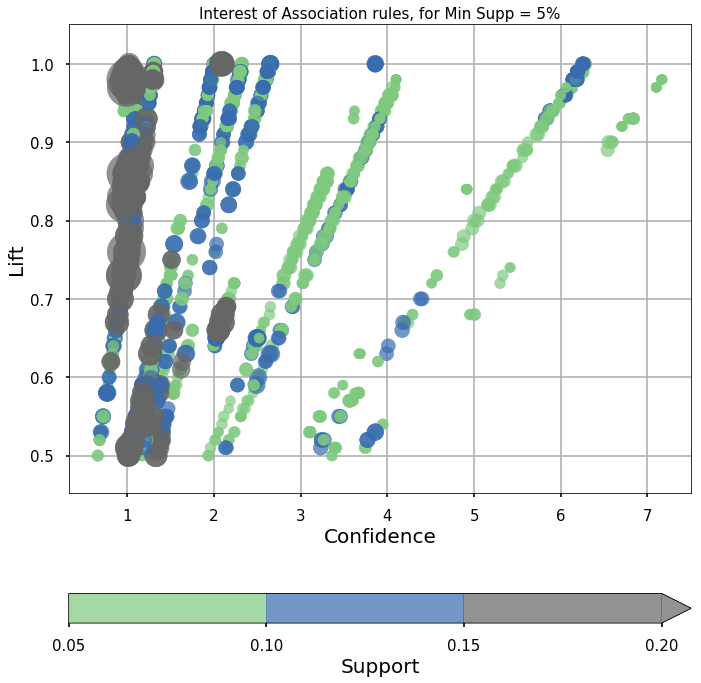

In [33]:
plt.close()
fig = plt.figure(figsize=(10,10))
plt.grid()
size= 2000*(df_filtered.Supp)**(1)
plt.scatter(x='Lift', y='Conf',data=df_filtered,s=size, alpha=0.7 ,c='Supp',cmap =plt.cm.get_cmap('Accent',3))

plt.clim(0.05,0.2)
cb = plt.colorbar(extend='max',orientation='horizontal',ticks=np.arange(0.05,0.70,0.05))
cb.set_label('Support')


plt.xlabel('Confidence')
plt.ylabel('Lift')
plt.title("Interest of Association rules, for Min Supp = 5%")
#plt.legend()
plt.tight_layout()

plt.savefig("../../images/rules/rules_supp5.pdf")

In [34]:
import seaborn as sns
sns.set_context("poster")
df_filtered.head()

  Consequent       Antecedent  Supp  Conf  Lift
0        N_P         ('7_D',)  0.05  0.98  1.00
1        N_P         ('6_D',)  0.05  0.97  0.99
2        N_P         ('5_D',)  0.05  0.95  0.97
3        N_P  ('4_D', 'N_WA')  0.05  1.00  1.02
4       N_WA   ('4_D', 'N_P')  0.05  0.85  1.00

In [41]:
def dict2str(item_dict):
    stringa = ""
    for key in item_dict.keys():
        item_str= " {}:{} ".format(key,item_dict[key])
        stringa+=item_str
    return stringa


In [42]:
#conf_min=0.6
df_plot = df_filtered.query("Lift>0.2 and Conf> 0.6 and Supp>0.01").sort_values(by=["Lift","Consequent"],ascending=False)

Cons_label=[]

for i in range(df_plot.shape[0]):
    Cons_label.append(dict2str(item2dict(df_plot.Consequent.iloc[i])))

df_plot['Cons_label']=Cons_label
df_plot.describe()

              Supp         Conf         Lift
count  4922.000000  4922.000000  4922.000000
mean      0.088948     0.890163     1.722576
std       0.057754     0.116679     1.181096
min       0.050000     0.610000     0.800000
25%       0.060000     0.830000     1.000000
50%       0.070000     0.950000     1.120000
75%       0.100000     0.990000     2.090000
max       0.840000     1.000000     7.170000

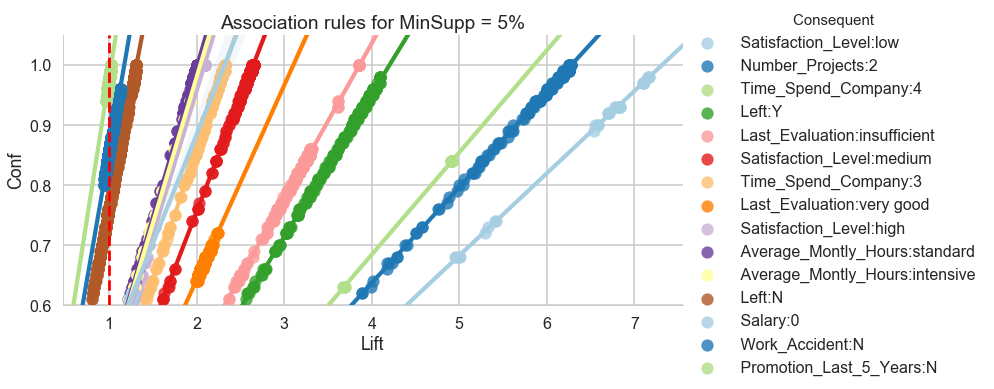

In [43]:
sns.set_style('whitegrid')

size= 2000*(df_filtered.Supp)**(1)

sns.set_palette("Paired")

left_plot = sns.lmplot(x='Lift',y='Conf',data=df_plot,hue='Cons_label',fit_reg=True,
                       aspect=(20/10), scatter_kws={"s": 150},
                       legend_out=True,palette='Paired')

left_plot._legend.set_title("Consequent ")

plt.ylim(0.45,1.05)
plt.ylim(0.6,1.05)
#plt.xlim(0.5,8.1)

plt.axvline(1,color='r',linestyle="--")

sns.set_palette("Paired")
plt.title("Association rules for MinSupp = 5%")


left_plot.savefig("../../images/rules/left_scatter.pdf")
#plt.scatter(x='Conf', y='Lift',data=df_filtered,s=size, alpha=0.7 ,c='Consequent',cmap =plt.cm.get_cmap('Accent',3))




In [216]:
?sns.lmplot()

In [44]:
df_plot.query("Conf>0.99").describe()
df_plot.head(100)

     Consequent                                         Antecedent  Supp  \
122      low_SL           ('4_T', 'Y_L', 'insufficient_LE', 'N_P')  0.05   
126      low_SL                  ('4_T', 'Y_L', 'insufficient_LE')  0.05   
112      low_SL   ('4_T', 'Y_L', 'insufficient_LE', 'N_WA', 'N_P')  0.05   
117      low_SL          ('4_T', 'Y_L', 'insufficient_LE', 'N_WA')  0.05   
151      low_SL          ('4_T', 'insufficient_LE', 'intensive_H')  0.05   
147      low_SL   ('4_T', 'insufficient_LE', 'intensive_H', 'N_P')  0.05   
187      low_SL   ('Y_L', 'insufficient_LE', 'intensive_H', 'N_P')  0.05   
191      low_SL          ('Y_L', 'insufficient_LE', 'intensive_H')  0.05   
156      low_SL          ('4_T', 'insufficient_LE', 'N_WA', 'N_P')  0.07   
160      low_SL                 ('4_T', 'insufficient_LE', 'N_WA')  0.07   
167      low_SL                         ('4_T', 'insufficient_LE')  0.07   
164      low_SL                  ('4_T', 'insufficient_LE', 'N_P')  0.07   
10       low

In [45]:
df_interesting = df_filtered.query(" Lift >5")
df_interesting = df_interesting.query(" Conf >0.95")
df_interesting = df_interesting.sort_values(by=['Consequent','Lift','Supp'],ascending=False)
df_interesting
#((df_interesting.Antecedent[665]))

     Consequent                                         Antecedent  Supp  \
122      low_SL           ('4_T', 'Y_L', 'insufficient_LE', 'N_P')  0.05   
126      low_SL                  ('4_T', 'Y_L', 'insufficient_LE')  0.05   
112      low_SL   ('4_T', 'Y_L', 'insufficient_LE', 'N_WA', 'N_P')  0.05   
117      low_SL          ('4_T', 'Y_L', 'insufficient_LE', 'N_WA')  0.05   
151      low_SL          ('4_T', 'insufficient_LE', 'intensive_H')  0.05   
147      low_SL   ('4_T', 'insufficient_LE', 'intensive_H', 'N_P')  0.05   
187      low_SL   ('Y_L', 'insufficient_LE', 'intensive_H', 'N_P')  0.05   
191      low_SL          ('Y_L', 'insufficient_LE', 'intensive_H')  0.05   
665        2_NP  ('Y_L', 'insufficient_LE', 'medium_SL', '3_T',...  0.09   
671        2_NP  ('Y_L', 'insufficient_LE', 'medium_SL', '3_T',...  0.09   
651        2_NP  ('Y_L', 'insufficient_LE', 'medium_SL', '3_T',...  0.08   
658        2_NP  ('Y_L', 'insufficient_LE', 'medium_SL', '3_T',...  0.08   
592        2

In [46]:
import sys
stdout= sys.stdout
sys.stdout = open('../../data/rules/rules_supp5.txt','w')
print( df_interesting.to_latex(index=False) )
sys.stdout=stdout

##?df.to_latex()



In [56]:
# funzione che converte la parte antecedent in lista di dizionari

from ast import literal_eval

def antecedent2list(antecedent_str):
    antecedent_tuple = literal_eval(antecedent_str)

    out_list = []
    for item in antecedent_tuple:
        out_list.append(item2dict(item=item))
        
    return out_list


def antecedent2dict(antecedent_str):
    """converte la singola parte antecedente 
    in dizionario """

    antecedent_tuple = literal_eval(antecedent_str)

    out_list = {}
    for item in antecedent_tuple:
        out_list.update(item2dict(item=item))
        
    return out_list


#esempio
#out= antecedent2list(df.Antecedent[45])
#out2 = antecedent2dict(df.Antecedent[45])

#df.Antecedent[45]





In [57]:
def df2df_list(df):
    """funzione che converte 
    le stringhe relative alle regole in 
    liste di dizionari """

    df_new = df.copy()

    df_new = df_new.drop(['Antecedent','Consequent'],axis=1)

    Antecedent=[]
    for i,item in enumerate(df.Antecedent):
        Antecedent.append(antecedent2list(item))

    df_new=df_new.assign(Antecedent=Antecedent)

    Consequent=[]
    for i,item in enumerate(df.Consequent):
        Consequent.append(item2dict(item))

    df_new=df_new.assign(Consequent=Consequent)
        
    return df_new        


def df2df_dict(df):
    """funzione che converte 
    le stringhe relative alle regole in 
    liste di dizionari """

    df_new = df.copy()

    df_new = df_new.drop(['Antecedent','Consequent'],axis=1)

    Antecedent=[]
    for i,item in enumerate(df.Antecedent):
        Antecedent.append(antecedent2dict(item))

    df_new=df_new.assign(Antecedent=Antecedent)

    Consequent=[]
    for i,item in enumerate(df.Consequent):
        Consequent.append(item2dict(item))

    df_new=df_new.assign(Consequent=Consequent)
        
    return df_new        


In [52]:
# Analisi regole Per LEFT

In [58]:
df_left = df_filtered.query(" Consequent=='Y_L'")
df_left = df_left.query("Conf >0.5 and Lift>1")
df_left = df_left.sort_values(by=['Supp','Conf','Antecedent','Supp','Conf'],ascending=False)

df_left.drop('Antecedent',axis=1)
#df_left.head(100)
#df_left.Antecedent.iloc[1]
#df_left.to_csv("regole_left.csv")
df_left.describe()
#df_left.iloc[1].Antecedent
#for i in range(100):
#    print df_left.iloc[i].Antecedent + " || Conf ="+str(df_left.iloc[i].Conf) + "  Supp="+str(df_left.iloc[i].Supp) 
    

             Supp        Conf        Lift
count  242.000000  242.000000  242.000000
mean     0.071157    0.814669    3.423182
std      0.021833    0.132431    0.557253
min      0.050000    0.510000    2.130000
25%      0.050000    0.730000    3.052500
50%      0.060000    0.850000    3.585000
75%      0.090000    0.930000    3.890000
max      0.150000    0.980000    4.100000

In [60]:
#converto in dizionario
df_left_dict=df2df_dict(df_left)

ant = df_left_dict.Antecedent
N_items = []
for i,ant in enumerate(df_left_dict.Antecedent):
    N_items.append(len(df_left_dict.Antecedent.iloc[i]))

df_left_dict['N_items_Ant']=N_items
df_left_dict.sort_values(by='N_items_Ant').head()
df_left_dict['Supp_norm']=df_left_dict.Supp/df_left_dict.N_items_Ant
df_left_dict.describe()


             Supp        Conf        Lift  N_items_Ant   Supp_norm
count  242.000000  242.000000  242.000000   242.000000  242.000000
mean     0.071157    0.814669    3.423182     4.136364    0.020449
std      0.021833    0.132431    0.557253     1.320914    0.014852
min      0.050000    0.510000    2.130000     1.000000    0.006250
25%      0.050000    0.730000    3.052500     3.000000    0.012000
50%      0.060000    0.850000    3.585000     4.000000    0.016667
75%      0.090000    0.930000    3.890000     5.000000    0.025000
max      0.150000    0.980000    4.100000     8.000000    0.150000

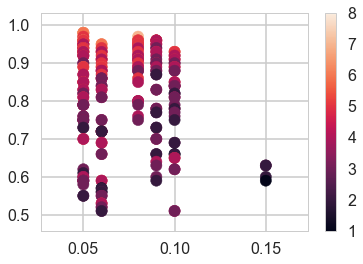

In [61]:
plt.scatter(x='Supp',y='Conf', c='N_items_Ant',  data=df_left_dict)
plt.colorbar()

# pre-filtering

In [62]:
# p
df_left_dict=df_left_dict.query('Supp>0.05 and Conf>0.50 and N_items_Ant<=20').sort_values(by=['Conf','Conf'],ascending=False)
df_left_dict.describe()

             Supp        Conf        Lift  N_items_Ant   Supp_norm
count  160.000000  160.000000  160.000000   160.000000  160.000000
mean     0.082000    0.801500    3.368625     3.900000    0.024727
std      0.019322    0.131934    0.555741     1.224488    0.016427
min      0.060000    0.510000    2.130000     1.000000    0.008571
25%      0.060000    0.715000    3.000000     3.000000    0.015000
50%      0.080000    0.840000    3.540000     4.000000    0.020000
75%      0.100000    0.910000    3.822500     5.000000    0.030000
max      0.150000    0.970000    4.060000     7.000000    0.150000

In [63]:
# rimuovo regole semanticamente non interessanti
# rimuovo le regole che contengono Work_accident:N nella parte antecedente
## selezione le row che contengono

lista_drop=[]
lista_ant=list(df_left_dict.Antecedent)

for i,ant in enumerate(lista_ant):
    #print ant
    if('Work_Accident' in ant.keys()):
        if(ant['Work_Accident']=='N'):
            lista_drop.append(i)
            #print(i)
    
df_left_dict =df_left_dict.drop(df_left_dict.index[lista_drop])
#df_left_dict.index[0]           
#df_left_dict.iloc[lista_drop[10]].Antecedent
df_left_dict.describe()

            Supp       Conf       Lift  N_items_Ant  Supp_norm
count  80.000000  80.000000  80.000000    80.000000  80.000000
mean    0.083250   0.799250   3.358125     3.400000   0.029167
std     0.019667   0.126008   0.530309     1.120579   0.019984
min     0.060000   0.550000   2.310000     1.000000   0.010000
25%     0.060000   0.712500   2.987500     3.000000   0.018000
50%     0.090000   0.835000   3.510000     3.000000   0.023750
75%     0.092500   0.900000   3.785000     4.000000   0.030833
max     0.150000   0.960000   4.050000     6.000000   0.150000

In [64]:
df_left_dict_filtered=df_left_dict.query('Supp>0.04 and Conf>0.89 and N_items_Ant<=5').sort_values(by=['Conf','N_items_Ant'],ascending=False)
df_left_dict_filtered.describe()
#df_left_dict_filtered
#df_left_dict_filtered.sort_values(by='N_items_Ant',ascending=True)
#for i in range(10):
#df_left_dict_filtered.iloc[17].Antecedent#+df_left_dict_filtered.Conf

            Supp       Conf       Lift  N_items_Ant  Supp_norm
count  23.000000  23.000000  23.000000    23.000000  23.000000
mean    0.085217   0.925652   3.886957     4.217391   0.021058
std     0.014100   0.021283   0.087979     0.735868   0.006036
min     0.060000   0.900000   3.770000     3.000000   0.012000
25%     0.090000   0.905000   3.800000     4.000000   0.018000
50%     0.090000   0.920000   3.880000     4.000000   0.022500
75%     0.090000   0.940000   3.950000     5.000000   0.023750
max     0.100000   0.960000   4.040000     5.000000   0.033333

In [65]:
# lista degli items
df_rules = df_left_dict_filtered.sort_values(by=["N_items_Ant","Conf"],ascending=False)
df_rules.describe()
#df_rules

            Supp       Conf       Lift  N_items_Ant  Supp_norm
count  23.000000  23.000000  23.000000    23.000000  23.000000
mean    0.085217   0.925652   3.886957     4.217391   0.021058
std     0.014100   0.021283   0.087979     0.735868   0.006036
min     0.060000   0.900000   3.770000     3.000000   0.012000
25%     0.090000   0.905000   3.800000     4.000000   0.018000
50%     0.090000   0.920000   3.880000     4.000000   0.022500
75%     0.090000   0.940000   3.950000     5.000000   0.023750
max     0.100000   0.960000   4.040000     5.000000   0.033333

In [66]:
lista_items=[]
for i in range(df_rules.shape[0]): 
    antecedent = df_rules.Antecedent.iloc[i]
    for key in antecedent.keys():
        lista_items.append( "{}:{}".format(key,antecedent[key]))

lista_items = list(set(lista_items)) # elementi unici
lista_items

['Salary:0',
 'Average_Montly_Hours:standard',
 'Last_Evaluation:insufficient',
 'Satisfaction_Level:medium',
 'Promotion_Last_5_Years:N',
 'Time_Spend_Company:3',
 'Number_Projects:2']

In [67]:
# adesso per ogni regola (riga del dataframe) voglio vedere quali elementi ci sono:1 c'è 0 non c'è
# per prima cosa dev
df = df_rules.copy()

antecedent_col=[]

for antecedent in list(df.Antecedent):
    antecedent_items=[]
    #antecedent = df.Antecedent.iloc[0]
    for key in antecedent.keys():
        antecedent_items.append( "{}:{}".format(key,antecedent[key]))    
    antecedent_col.append(antecedent_items)

df['antecedent_list']=antecedent_col
df.head()

     Supp  Conf  Lift                                         Antecedent  \
670  0.09  0.96  4.04  {u'Satisfaction_Level': u'medium', u'Last_Eval...   
689  0.09  0.96  4.02  {u'Satisfaction_Level': u'medium', u'Last_Eval...   
861  0.09  0.95  3.99  {u'Promotion_Last_5_Years': u'N', u'Last_Evalu...   
994  0.06  0.94  3.96  {u'Salary': u'0', u'Satisfaction_Level': u'med...   
765  0.09  0.93  3.91  {u'Satisfaction_Level': u'medium', u'Last_Eval...   

          Consequent  N_items_Ant  Supp_norm  \
670  {u'Left': u'Y'}            5      0.018   
689  {u'Left': u'Y'}            5      0.018   
861  {u'Left': u'Y'}            5      0.018   
994  {u'Left': u'Y'}            5      0.012   
765  {u'Left': u'Y'}            5      0.018   

                                       antecedent_list  
670  [Satisfaction_Level:medium, Last_Evaluation:in...  
689  [Satisfaction_Level:medium, Last_Evaluation:in...  
861  [Promotion_Last_5_Years:N, Last_Evaluation:ins...  
994  [Salary:0, Satisfacti

In [68]:
# adesso controllo per ogni regola quali items ci sono
row = df.antecedent_list.iloc[0]
lista_rules=[]

for i in range(df.shape[0]):

    row = df.iloc[i]
    r1 = [] #singola regola
    #print row.antecedent_list
    
    for i,item in enumerate(lista_items): #ciclo sulla lista degli items
        r1.append(lista_items[i] in row.antecedent_list) 

    r1.append(row.Conf) # aggiungo anche la confidence
    r1.append(row.Supp) # aggiungo anche il support
    lista_rules.append(r1)

#fine
lista_rules
lista_items.append('Conf')
lista_items.append('Supp')

lista_items

['Salary:0',
 'Average_Montly_Hours:standard',
 'Last_Evaluation:insufficient',
 'Satisfaction_Level:medium',
 'Promotion_Last_5_Years:N',
 'Time_Spend_Company:3',
 'Number_Projects:2',
 'Conf',
 'Supp']

In [69]:
df.antecedent_list.iloc[0]

['Satisfaction_Level:medium',
 'Last_Evaluation:insufficient',
 'Average_Montly_Hours:standard',
 'Time_Spend_Company:3',
 'Number_Projects:2']

In [72]:
        
#type(lista_rules)
#len(lista_items)
df_rules_matrix = pd.DataFrame(lista_rules)#.transpose()
df_rules_matrix.columns= lista_items

df_rules_matrix.head()
## ATTENTION TO THE REORDER!!!!!
## ATTENTION TO THE REORDER!!!!!
## ATTENTION TO THE REORDER!!!!!
df_rules_matrix=df_rules_matrix.sort_values(by=['Conf',
    'Number_Projects:2',
                                               'Time_Spend_Company:3',
                                                'Last_Evaluation:insufficient',
                                                 'Satisfaction_Level:medium',
                                                'Promotion_Last_5_Years:N',
                                                'Salary:0'
])
"""
df_rules_matrix=df_rules_matrix[['Number_Projects:2',
                                               'Time_Spend_Company:3',
                                                'Last_Evaluation:insufficient',
                                                 'Satisfaction_Level:medium',
                                                'Promotion_Last_5_Years:N',
                                'Salary:0','Conf','Supp'
                                 
]]
"""

df_rules_matrix=df_rules_matrix.replace([True,False],[10,0])
df_rules_matrix

    Salary:0  Average_Montly_Hours:standard  Last_Evaluation:insufficient  \
7          0                             10                            10   
22         0                             10                            10   
18         0                             10                            10   
8         10                             10                             0   
21         0                              0                             0   
17         0                              0                             0   
20         0                              0                            10   
16        10                             10                             0   
15         0                              0                            10   
14         0                             10                             0   
5          0                             10                             0   
6         10                              0                             0   

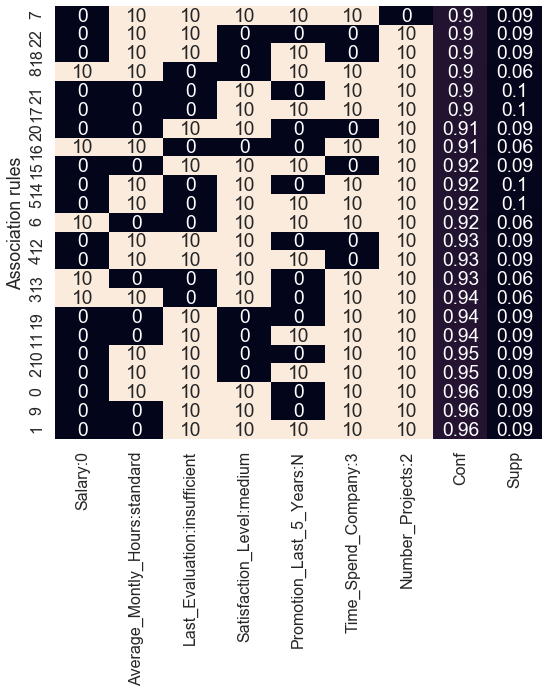

In [73]:
fig, ax = plt.subplots(figsize=(8,10))   
heat=sns.heatmap(df_rules_matrix,annot=True,cbar=False)
plt.ylabel('Association rules')      
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig("../../images/rules/left_heatmap.pdf")

In [1141]:
df_rules.query('Conf>0.95').iloc[0].Antecedent

{'Average_Montly_Hours': 'standard',
 'Last_Evaluation': 'insufficient',
 'Number_Projects': '2',
 'Satisfaction_Level': 'medium',
 'Time_Spend_Company': '3'}

In [40]:
#item_dict = df_left_dict_filtered.iloc[0].Antecedent
#print item_dict


#dict2str(item_dict)


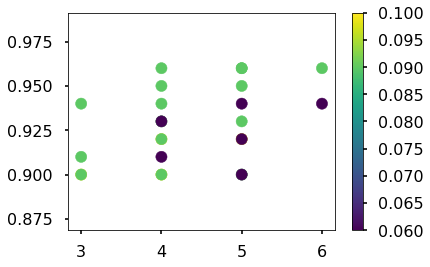

In [787]:
plt.scatter(x='N_items_Ant',y='Conf', c='Supp',  data=df_left_dict_filtered)
plt.colorbar()

In [678]:
import sys
stdout= sys.stdout
sys.stdout = open('../../data/rules/rules_left.txt','w')
print( df_left_dict_filtered.to_latex(index=False) )
sys.stdout=stdout

##?df.to_latex()



# Conversione DataFrame

In [16]:
variables = ['Time_Spend_Company',
            'Department',
            'Number_Projects',
            'Promotion_Last_5_Years',
            'Left',
            'Average_Montly_Hours',
            'Work_Accident',
            'Last_Evaluation',
            'Salary',
            'Satisfaction_Level']

other_columns = ['Antecedent','Consequent','Supp','Conf','Lift']

from copy import copy
columns = copy(variables)

for col in other_columns:
    columns.append(col)


In [17]:
var_dict = {
    'T':'Time_Spend_Company',
    'D':'Department',
    'NP':'Number_Projects',
    'P':'Promotion_Last_5_Years',
    'L':'Left',
    'H':'Average_Montly_Hours',
    'WA':'Work_Accident',
    'LE':'Last_Evaluation',
    'S':'Salary',
    'SL':'Satisfaction_Level'
}

def item2dict(item):
    ## splitto la stringa
    item_split = item.split('_')
    # definisco la lista variabile,valore
    item_list = {var_dict[item_split[1]] : item_split[0]}
    return item_list



item=df.Consequent[20]
item2dict(item)
#item

{'Work_Accident': 'N'}

In [520]:
item_dict = item2dict(item)

def dict2str(item_dict):
    for key in item_dict.keys():
        item_str= "{}:{}".format(key,item_dict[key])
    return item_str

dict2str(item_dict)


'Work_Accident:N'

In [521]:
# funzione che converte la parte antecedent in lista di dizionari

from ast import literal_eval

def antecedent2list(antecedent_str):
    antecedent_tuple = literal_eval(antecedent_str)

    out_list = []
    for item in antecedent_tuple:
        out_list.append(item2dict(item=item))
        
    return out_list


def antecedent2dict(antecedent_str):
    """converte la singola parte antecedente 
    in dizionario """

    antecedent_tuple = literal_eval(antecedent_str)

    out_list = {}
    for item in antecedent_tuple:
        out_list.update(item2dict(item=item))
        
    return out_list


#esempio
out= antecedent2list(df.Antecedent[45])
out2 = antecedent2dict(df.Antecedent[45])

df.Antecedent[45]

out2.keys()
out2


{'Department': '3', 'Left': 'N'}

In [ ]:
def df2df_list(df):
    """funzione che converte 
    le stringhe relative alle regole in 
    liste di dizionari """

    df_new = df.copy()

    df_new = df_new.drop(['Antecedent','Consequent'],axis=1)

    Antecedent=[]
    for i,item in enumerate(df.Antecedent):
        Antecedent.append(antecedent2list(item))

    df_new=df_new.assign(Antecedent=Antecedent)

    Consequent=[]
    for i,item in enumerate(df.Consequent):
        Consequent.append(item2dict(item))

    df_new=df_new.assign(Consequent=Consequent)
        
    return df_new        


def df2df_dict(df):
    """funzione che converte 
    le stringhe relative alle regole in 
    liste di dizionari """

    df_new = df.copy()

    df_new = df_new.drop(['Antecedent','Consequent'],axis=1)

    Antecedent=[]
    for i,item in enumerate(df.Antecedent):
        Antecedent.append(antecedent2dict(item))

    df_new=df_new.assign(Antecedent=Antecedent)

    Consequent=[]
    for i,item in enumerate(df.Consequent):
        Consequent.append(item2dict(item))

    df_new=df_new.assign(Consequent=Consequent)
        
    return df_new        



# Analisi in frequenza delle regole per LEFT

In [313]:
# converto in dizionario 
df_left_dict = df2df_dict(df_left)
#df_left_dict.head()

     Supp  Conf  Lift                                         Antecedent  \
591  0.05  0.98   4.1  {u'Salary': u'0', u'Satisfaction_Level': u'med...   
599  0.05  0.98   4.1  {u'Salary': u'0', u'Satisfaction_Level': u'med...   
607  0.05  0.98   4.1  {u'Salary': u'0', u'Satisfaction_Level': u'med...   
614  0.05  0.98   4.1  {u'Salary': u'0', u'Satisfaction_Level': u'med...   
622  0.05  0.98   4.1  {u'Salary': u'0', u'Satisfaction_Level': u'med...   

          Consequent  
591  {u'Left': u'Y'}  
599  {u'Left': u'Y'}  
607  {u'Left': u'Y'}  
614  {u'Left': u'Y'}  
622  {u'Left': u'Y'}  

In [786]:
dict_values = (df_left_dict_filtered.Antecedent.iloc[0])
#dict_values.keys()
dict_values

{'Average_Montly_Hours': 'standard',
 'Last_Evaluation': 'insufficient',
 'Number_Projects': '2',
 'Promotion_Last_5_Years': 'N',
 'Salary': '0',
 'Satisfaction_Level': 'medium',
 'Time_Spend_Company': '4'}

In [315]:

lista_items=[]
lista_counts=[]

for variable in dict_values.keys():

    print(variable)
    #lista valori associata alla variabile
    lista_values = (dict_values[variable])
    #print(lista_values)

    if (len(lista_values)==0):
        break
    
    # estraggo i valori unici:n
    uniques = [lista_values[0]] #inizializzo col primo valore
    for value in lista_values:
        if(value not in uniques):
            uniques.append(value)
    # conto i valori per ciascun item unico
    uniques_counts=[]
    for i,unique in enumerate(uniques):
        uniques_counts.append(0)
        for value in lista_values:
            if (value ==unique) :
                uniques_counts[i]+=1

    # definisco gli items e li aggiungo alla lista complessiva
    for unique in uniques:
        lista_items.append("{} : {}".format(variable,unique))

    # aggiungo i counts alla lista complessiva    
    lista_counts=lista_counts+uniques_counts

#uniques_counts
#uniques
lista_items
lista_counts

Salary
Satisfaction_Level
Last_Evaluation
Work_Accident
Number_Projects
Department


[49, 55, 65, 45, 73]

In [316]:
lista_items

['Salary : 0',
 'Satisfaction_Level : medium',
 'Last_Evaluation : insufficient',
 'Work_Accident : N',
 'Number_Projects : 2']

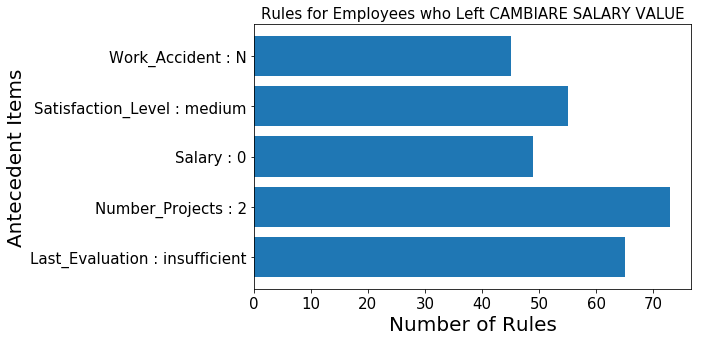

In [320]:
fig = plt.figure(figsize=(10,5))

x=lista_items
y= lista_counts
#y=np.array(lista_counts)/max(np.array(lista_counts))
plt.barh(x,y)
plt.ylabel('Antecedent Items')
plt.xlabel('Number of Rules')
plt.title('Rules for Employees who Left CAMBIARE SALARY VALUE')
plt.tight_layout()
plt.savefig("../../images/rules/rules_left.pdf")

In [300]:
prova= np.array(lista_counts)/max(np.array(lista_counts))
#max(prova)
prova

array([0, 0, 1, 0, 1])